In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

$2.$ Usando el código de la clase, genere 10 esferas localizadas aleatoriamente en la mesa $A = 40 \times 40$ con velocidades aleatorias entres $-5 m/s$ y $5 m/s$. Simule $10 s$ con un paso de integración de $h = 0.001 s$ y reduzca la simulación en un factor de $200$; quitando la interacción con la pared. Conteste las siguientes preguntas exponiendo los conceptos físicos involucrados.

In [295]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.a=self.f/self.m
        self.p = self.m*self.v
        
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)

        # Fisica
        self.K = 20.
        self.G = -9.8
        self.VEk = np.zeros(len(t))
        self.Ep = 0.
        self.VEp = np.zeros(len(t))
        
        self.L = np.zeros_like(self.R)
        #self.UK = 0 #Energía potencial
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetPotentialEnergy(i)
        self.a = self.f/self.m
        self.SetAngularMomentum(i)
        # Euler
        #self.r += self.dt*self.v
        #self.v += self.dt*self.a
        
        #self.SetPotentialEnergy(i)
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        
        #FG = self.m*self.G
        
        #self.f =  np.add(self.f,FG)
        FG= self.m*-9.8
        self.f=FG
        
            
    
    #def Calculate
    
    
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        #self.Ep = 0.
    # Setter
    
    def SetAngularMomentum(self, i):
        #self.L[i] = self.r[0]*(self.m*self.v)[1]-self.r[1]*(self.m*self.v)[0]
        self.L[i] = np.cross(self.r, self.m*self.v) 
    
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        
    def SetAceleration(self, i):
        self.a[i]
    def SetPotentialEnergy(self,i):
        self.VEp[i] = self.Ep
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotentialEnergy(self,scale=1):
        return self.VEp[::scale] 
    
    def GetAngularMomentum(self, scale=1):
        return self.L[::scale]
    #def GetPotentialEnergy(self,scale=1):
     #   return self.UK[::scale] 
    # Debes agregar las paredes en este punto

In [296]:
def GetParticles(N,t):
    Particles = []
    for i in range(N):
        
        Rx= -15.
        Ry=-10
        locals()["r" + str(i)] = np.array([Rx,Ry]) #Posición
        #print(Rx_aleatoria, Ry_aleatoria )
        Vx=2.
        Vy=0.
        
        locals()["v" + str(i)] = np.array([Vx,Vy]) #Velocidad
        
        locals()["a" + str(i)] = np.array([0.,0.]) #Aceleración
       
        locals()["p" + str(i)] = Particle(locals()["r" + str(i)],
                                          locals()["v" + str(i)],
                                          locals()["a" + str(i)],
                                          t,m=1,radius=2,Id=i) #Partículas
        Particles.append(locals()["p" + str(i)])
    
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return Particles

In [297]:
dt = 0.001
tmax = 30
t = np.arange(0,tmax,dt)
Particles = GetParticles(1,t)

AttributeError: 'Particle' object has no attribute 'f'

In [ ]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            #print(Particles[i].v[0])
            Particles[i].ResetForce()
            #Particles[i].a[1]=-9.8
            
            
            if (Particles[i].r[0]-Particles[i].radius)<=(-22.) or (Particles[i].r[0]+Particles[i].radius)>=22.:
                Particles[i].v[0]*=-1*0.9
                
                #Paricles[i].
                #Particles[i].Ep[0]*
            if (Particles[i].r[1]-Particles[i].radius)<=(-22.) or (Particles[i].r[1]+Particles[i].radius)>=22.:
                Particles[i].v[1]*=-1*0.9
                
                
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [298]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|██████████████████████████████████████████████████| 30000/30000 [00:03<00:00, 8709.58 Steps/s]


In [299]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]

<IPython.core.display.Javascript object>


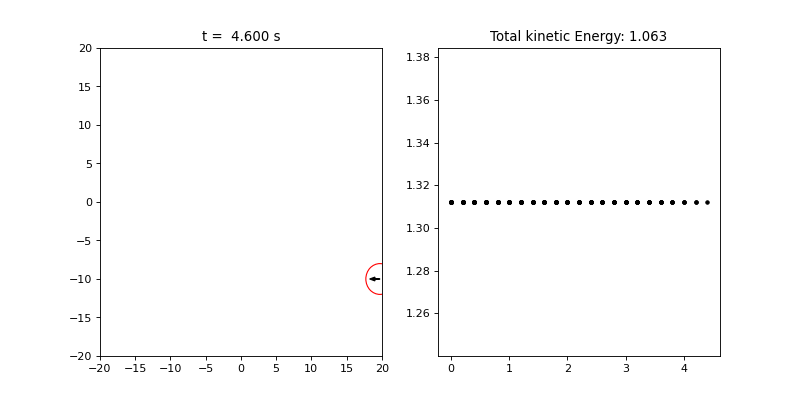

In [300]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
#ax2 = fig.add_subplot(133)
def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)